In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
# Combine the data into a single dataset
df=pd.merge(mouse_metadata,study_results,on="Mouse ID", how = 'right')

# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
mice=df["Mouse ID"].value_counts()
len(mice)

249

In [8]:
#Display the number of unique mice IDs in the data, and then check for any mouse ID with duplicate time points. 
duplicateRows = df[df.duplicated()]
duplicateRows = df[df.duplicated(['Mouse ID', 'Timepoint'])]
df.duplicated().sum()

1

In [9]:
#drop duplicates
df.drop_duplicates()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
new_df = df.drop_duplicates()
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [60]:
new_df = pd.DataFrame(new_df)
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
#Use the groupby method to generate the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen. Combine these objects into a single summary statistics DataFrame.
mean_volume = df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_volume = df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
var_volume = df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
std_volume = df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem_volume = df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
sem_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [13]:
ss_df = pd.DataFrame({"Mean": mean_volume, "Median": median_volume, "Variance": var_volume, "Std Deviation": std_volume, "SEM": sem_volume})
ss_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#For the second DataFrame, use the agg method to produce the same result in one line of code
agg_df = df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": [np.mean, np.median, np.var, np.std, st.sem]})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [15]:
mousecount_df= pd.DataFrame({"Drug Regimen":
                             ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva","Ramicane", "Stelasyn", "Zoniferol"],
                              "Mouse ID": [230, 178, 178, 188, 186, 181, 161, 228, 181, 182] })
mousecount_df

,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


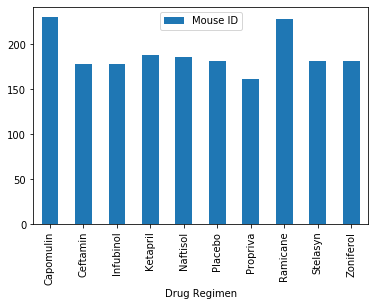

In [16]:
#Create the first bar chart with the Pandas DataFrame.plot method
mouse_count_df = mousecount_df.plot.bar(x="Drug Regimen",y="Mouse ID")
plt.ylabel= ("Number of mice")
plt.title= ("Mice Count per treatment")
plt.show()

In [17]:
#create the second bar chart with Matplotlib's pyplot methods.
mousecount_df.plot(kind='bar', mousecount_df, x_axis="Drug Regimen", y_axis= "Mice Count", height=0.8)
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")
plt.title("Mice Count per treatment")

SyntaxError: positional argument follows keyword argument (2467927424.py, line 2)

In [18]:
#  Group the data by gender and get the total number 
count_gender = df.groupby(["Mouse ID","Sex"])
count_gender


micegender_df = pd.DataFrame(count_gender.size())
micegender_df




,,0
Mouse ID,Sex,
a203,Female,10
a251,Female,10
a262,Female,10
a275,Female,10
a366,Female,7
...,...,...
z435,Female,3
z578,Male,10
z581,Female,10


In [19]:
#Get the split between male and female
gender_split = pd.DataFrame(micegender_df.groupby(["Sex"]).count())
gender_split.columns = ["Total Count"]

#get the percentage for pie chart
gender_split["Percentage of Sex"] = (gender_split["Total Count"]/gender_split["Total Count"].sum())



gender_split

,Total Count,Percentage of Sex
Sex,,
Female,124,0.497992
Male,125,0.502008


[Text(0.5, 1.0, 'Distribution of female Vs male mice')]

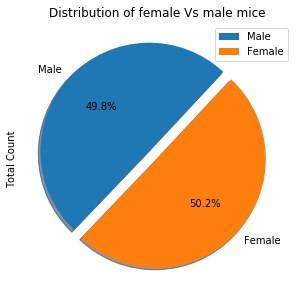

In [44]:
#pie chart with pandas
gender_split = pd.DataFrame({'Total Count': [124, 125],
                            'Percentage of Sex': [0.497992, 0.502008]},
                           index=['Female', 'Male'])
plot = gender_split.plot.pie(y='Total Count', figsize=(5,5), labels=labels, autopct='%1.1f%%', explode = (0.1, 0.0), shadow=True, startangle = 47)
plot.set(title ="Distribution of female Vs male mice")

Distribution of female Vs male mice


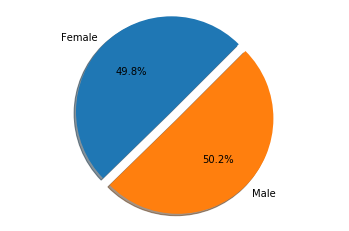

In [59]:
#pie chart with matplotlib
data = [124,125]
labels ='Female', 'Male'
colors=['lightblue', 'silver']
plt.pie(data,labels=labels,autopct='%1.1f%%',explode = (0.1, 0.0),  shadow=True, startangle=45)
plt.axis("equal",fontsize = 14)
plt.title="Distribution of female Vs male mice"
print(plt.title)

In [202]:
Capomulin_last = new_df.loc[new_df["Drug Regimen"] == "Capomulin","Tumor Volume (mm3)"]
Ramicane_last = new_df.loc[new_df["Drug Regimen"] == "Ramicane","Tumor Volume (mm3)"]
Infubinol_last = new_df.loc[new_df["Drug Regimen"] == "Infubinol","Tumor Volume (mm3)"]
Ceftamin_last = new_df.loc[new_df["Drug Regimen"] == "Ceftamin","Tumor Volume (mm3)"]

top_four = [Capomulin_last,Ramicane_last,Infubinol_last,Ceftamin_last]
top_four

[10      45.000000
 11      43.878496
 12      37.614948
 13      38.177232
 14      36.866876
           ...    
 440     47.685963
 1452    45.000000
 1453    45.597064
 1454    46.059608
 1455    46.539206
 Name: Tumor Volume (mm3), Length: 230, dtype: float64,
 0      45.000000
 1      38.825898
 2      35.014271
 3      34.223992
 4      32.997729
          ...    
 449    43.166373
 450    45.000000
 451    45.877545
 452    46.378092
 453    44.183451
 Name: Tumor Volume (mm3), Length: 228, dtype: float64,
 454     45.000000
 455     48.508468
 456     51.852437
 457     52.777870
 458     55.173336
           ...    
 1868    54.316407
 1869    56.286750
 1870    58.628399
 1871    60.053740
 1872    62.754451
 Name: Tumor Volume (mm3), Length: 178, dtype: float64,
 484     45.000000
 485     46.795257
 486     47.371343
 487     49.734404
 488     50.513437
           ...    
 1851    57.173538
 1852    59.033275
 1853    61.153140
 1854    63.469549
 1855    64.729837
 Name: 

In [230]:
top_one = [Capomulin_last]
top_one

[10      45.000000
 11      43.878496
 12      37.614948
 13      38.177232
 14      36.866876
           ...    
 440     47.685963
 1452    45.000000
 1453    45.597064
 1454    46.059608
 1455    46.539206
 Name: Tumor Volume (mm3), Length: 230, dtype: float64]

In [174]:
last_cap = Capomulin_last.groupby(["Mouse ID"]).max()['Timepoint']
last_vol = pd.DataFrame(last_cap)

KeyError: 'Mouse ID'

In [231]:
last_vol
merge= pd.merge(last_vol, new_df, on=("Mouse ID", "Timepoint"), how ="right")
merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
1887,z969,25,Naftisol,Male,9,30,63.145652,2
1888,z969,30,Naftisol,Male,9,30,65.841013,3
1889,z969,35,Naftisol,Male,9,30,69.176246,4
1890,z969,40,Naftisol,Male,9,30,70.314904,4


In [176]:
tumors_cap = merge["Tumor Volume (mm3)"]
tumor_volume_date = []

In [248]:
copomulin= merge.loc[merge["Drug Regimen"] == "Capomulin"]
(copomulin["Mouse ID"],["Tumor Volume (mm3)"],["Weight(g)"])

(0       b128
 1       b742
 2       f966
 3       g288
 4       g316
         ... 
 440     i557
 441     i557
 1452    r157
 1453    r157
 1454    r157
 Name: Mouse ID, Length: 230, dtype: object,
 ['Tumor Volume (mm3)'],
 ['Weight(g)'])

In [177]:
Q=tumors_cap.quantile([.25,.5,.75])
Q1 =tumors_cap.quantile(q=0.25)
Q3 =tumors_cap.quantile(q=0.75)
IQR = Q3-Q1
MEDIAN=tumors_cap.quantile(q=0.5)

LOWERBOUND=Q1-(1.5*IQR)
UPPERBOUND=Q3+(1.5*IQR)

In [ ]:
[series,[]]

In [201]:
for i in top_four:
    Q1=i.quantile(q=0.25)
    Q3=i.quantile(q=0.75)
    M=i.quantile(q=0.5)
    IQR=Q3-Q1
    LOWERBOUND=Q1-(1.5*IQR)
    UPPERBOUND=Q3+(1.5*IQR)
    print(f"The lower quartile of i is: {Q1}")
    print(f"The upper quartile of i is: {Q3}")
    print(f"The interquartile range is:{IQR}") 
    print(f"The median is:{M}")
    print(f"Values that are below {LOWERBOUND} could be outliters")
    print(f"Values that are below {UPPERBOUND} could be outliters")
   
    print('\n')                        
                                    

    

The lower quartile of i is: 37.685932865
The upper quartile of i is: 45.0
The interquartile range is:7.314067135000002
The median is:41.557808879999996
Values that are below 26.714832162499995 could be outliters
Values that are below 55.9711007025 could be outliters


The lower quartile of i is: 36.67463458499999
The upper quartile of i is: 45.0
The interquartile range is:8.325365415000007
The median is:40.67323554
Values that are below 24.18658646249998 could be outliters
Values that are below 57.48804812250001 could be outliters


The lower quartile of i is: 47.3123533
The upper quartile of i is: 57.314443967500004
The interquartile range is:10.002090667500006
The median is:51.82058438
Values that are below 32.309217298749985 could be outliters
Values that are below 72.31757996875001 could be outliters


The lower quartile of i is: 47.208427112500004
The upper quartile of i is: 56.801437570000004
The interquartile range is:9.5930104575
The median is:51.77615728000001
Values that are 

([<matplotlib.axis.XTick at 0x7fb450679110>,
 <a list of 4 Text xticklabel objects>)

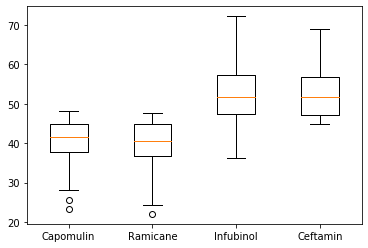

In [219]:
final = plt.boxplot([Capomulin_last,Ramicane_last,Infubinol_last,Ceftamin_last])
plt.xticks([1,2,3,4], ["Capomulin","Ramicane","Infubinol","Ceftamin"])